In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [0]:
# sample dataset

np.random.seed(42)

# create a dataframe with 100 rows and 5 columns

df = pd.DataFrame({
    'Category': np.random.choice(['A', 'B', 'C'], 100),

    'Value': np.random.randint(1, 100, 100),

    # generate 100 random numbers but from standard normal distribution(mean=0, std=1).Values centered around 0 and numbers close to 0
    'X': np.random.randn(100),

    # generate 100 random numbers from normal distribution. increasing spread by 50 and move mean by +20
    'Y': np.random.randn(100) *  50 + 20,

    # Date column: 100 consecutive days from 2025-01-01
    'Date': pd.date_range('2025-01-01', periods=100, freq='D')

})

print(df)

   Category  Value         X           Y       Date
0         C      8  0.257550   45.752384 2025-01-01
1         A     88 -0.074446  212.636575 2025-01-02
2         C     63 -1.918771   48.544526 2025-01-03
3         C     11 -0.026514   76.778282 2025-01-04
4         A     81  0.060230   67.700088 2025-01-05
..      ...    ...       ...         ...        ...
95        A     59  1.053802   50.518513 2025-04-06
96        A     32 -1.377669   18.954920 2025-04-07
97        C     96 -0.937825   25.866369 2025-04-08
98        A     88  0.515035   83.883245 2025-04-09
99        A     52  0.513786   -9.578569 2025-04-10

[100 rows x 5 columns]


Visualizations

1. Bar Chart (Comparison)

- Use cases: comparing categories, ranking and distribution of discrete values

In [0]:
# compare average value per category

df_mean = df.groupby('Category', as_index= False)['Value'].mean()

fig= px.bar(
    df_mean, 
    x= 'Category', 
    y='Value', 
    color_discrete_sequence=['skyblue'],
    title= 'Compare average value per Category'
)

fig.show()

2. Line Chart (Trend)

- Use cases: Time Series, showing changes/trends over time

In [0]:
# value over time

fig = px.line(
    df,
    x='Date',
    y='Value',
    title='Value over Time'
)

fig.show()

3. Scatter plots (Relationships)

- Use cases: Correlation, outlier detection, clustering patterns

In [0]:
# X vs Y with Category and value

fig = px.scatter(df, x='X', y='Y', color='Category', size='Value', hover_data=['Date'])
fig.update_layout(title='Scatter plot of X vs Y with Category and Value')
fig.show()

4. Histogram (Distribution)

- Use cases: Understanding Data Distribution, skeweness, frequency

In [0]:
# Distribution of values

fig = px.histogram(
    df,
    x='Value',
    nbins=10,
    color_discrete_sequence=['purple'],
    title='Distribution of Values'
)

fig.update_layout(
    xaxis_title = 'Value',
    yaxis_title = 'Frequency',
    bargap=0.2
)

fig.show()

5. Box Plot (Spread & Outliers)

- Use cases: comparing distribution across groups, spotting outliers

In [0]:
# spread & outliers by category

fig = px.box(
    df,
    x='Category',
    y='Value',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title = 'Box Plot - Spread & Outliers by Category'
)

fig.show()

- Bottom whisker - Min value (or 1.5*IQR below Q1) - Lowest values that is not an outlier
- Bottom of box - Q1(25th percentile) - 25% of data lies below this value
- Line inside the box - Median (50th percentile) - Median values 
- Top of box - Q3(75th percentile) - 75% of data lies below this value
- Top whisker - Max value (or 1.5*IQR above Q3) - Highest observed value that is not an outlier

6. Heatmap (Correlation matrix)

- Use cases: Relationship among multiple variables. Quick pattern spotting

In [0]:
# relationship among X,Y and Value

corr_matrix = df[['X', 'Y', 'Value']].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r', #'CoolWarm equivalent'
    title = 'Heatmap - Correlation Matrix'
)

fig.show()

- +1 - perfect positive correlation
- 0 - no correlation (no linear relationship)
- -1 - perfect negative correlation  (move in opposite directions)

- Red - High positive correlation
- Blue - negative correlation
- White/light blue = weak or no correlation

7. Pie Chart (Composition)

- Use cases: Show proportions/percentage share

In [0]:
# Category composition

df_cat = df['Category'].value_counts().reset_index()
df_cat.columns = ['Category', 'Count']

fig = px.pie(
    df_cat,
    names = 'Category',
    values='Count',
    title='Category composition',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.show()

8. Violin Plot (Distribution & Density)

- Use cases: Need to compare both spread and density

In [0]:
# distribution by category

fig = px.violin(
    df,
    x='Category',
    y='Value',
    color='Category',
    color_discrete_sequence=px.colors.qualitative.Set1,
    box=True, # show box inside violin
    points='all',
    title = 'Violin Plot - Distribution per Category'
)

fig.show()

- Wider areas - More data points (common values)
- Narrower areas - Fewer data point (less common values)

9. Pair Plot (Mutlivariate relationships)

- Grid with scatterplots and histograms
- Use cases - Explore relationships between multiple variables

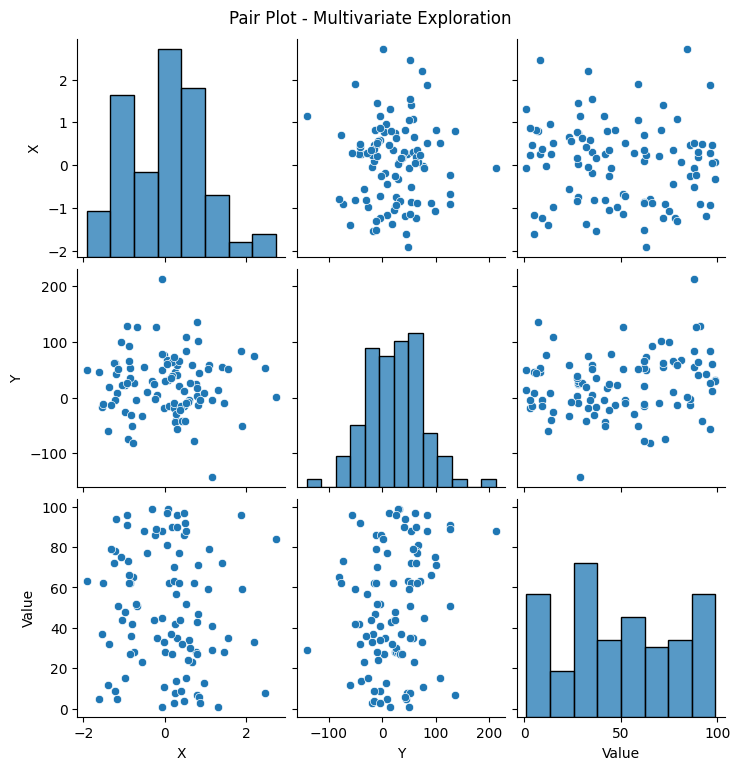

In [0]:
# Relationship between X, Y and values

sns.pairplot(df[['X','Y','Value']])
plt.suptitle('Pair Plot - Multivariate Exploration', y=1.02)
plt.show()

- Diagonal with bell shaped histograms - normal distributions
- Scatterplot with upward trends - positive correlation
- Scatterplot with no clear pattern - weak or no correlation
- clustered scatterplots - categorical grouping effects

- Pairplot - Visual, detailed. Great for exploring data patterns and relationships early in EDA
- Heatmap - Compact, Numerical summary. Great for seeing linear correlations at a glance esp when there are many variables

- Use pairplot for exploration.Heatmap for summarization

Summary

- Bar/ Column Charts - Compare categories
- Line Charts - Show trends over time
- Scatter Plots - Show relationships or correlation
- Histograms - Distribution of a single variable
- Box/Violin - Compare distribution across groups
- Heatmaps - Correlation matrix
- Pie Chart or Donut Charts - For composition
- Pair plots - Multi-variable analysis